In [6]:
import pandas as pd

In [7]:
import numpy as np

In [151]:
results = pd.DataFrame(data={"Dask":[604.84,726.58,1081.46,1734.15,2381.18,4847.182541],
                             "Myria":[383.047918, 591.677918, 986.376918, 1821.948918, 2825.507918, 5515.205029],
                             "Spark":[377.560062, 650.516533, 1035.264338, 1917.513293, 2711.942099, 5541.589612],
                             #"SciDB":[1246.487, 2520.439, 5028.889, 10076.557, 14947.759,  31251.326],
                             #"Tensorflow":[4072.3, 7772.6, 14628.3, 28643.8, 43266.459, 91091],
                             "Cloudknot":[np.nan, 1272, 1919, 3380, 3848, 6026],
                             "Subjects":[1, 2, 4, 8, 12, 25]})

In [152]:
results = results.reset_index().melt(id_vars=['Subjects']).set_index(['Subjects', 'variable'])

In [153]:
results = results.reset_index()

In [154]:
results = results[results["variable"] !="index"]

In [155]:
results = results.rename({"variable":"System", "value":"Time(sec)"}, axis=1)

In [156]:
results.head()

,Subjects,System,Time(sec)
6,1,Cloudknot,NaN
7,2,Cloudknot,1272.0
8,4,Cloudknot,1919.0
9,8,Cloudknot,3380.0
10,12,Cloudknot,3848.0


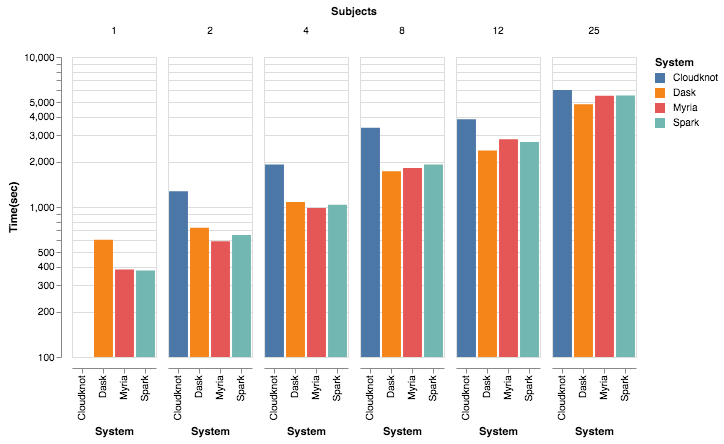

In [162]:
import altair as alt
from vega_datasets import data

c = alt.Chart(results).mark_bar()
c.encode(
    alt.X("System:O"),
    alt.Y('Time(sec):Q', scale=alt.Scale(base=10, type="log")),
    column='Subjects:O',
    color="System")